# 4 Sine model 생성하기

In [1]:
#!pip install Tensorflow==2.0

input x를 바탕으로 sine y를 예측할 수 있는 model을 구축할 것이다.

---

## 4.1 Import dependencies(종속성 가져오기)

우선 필요한 모든 library를 import한다.

In [6]:
# tensorflow import error를 없애기 위한 os import, os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

2023-01-16 13:13:32.580381: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

## 4.2 numpy를 사용한 난수 생성, 사인 계산

우선 train data set을 만들 것이다. sine 모양을 따르는 임의의 점을 생성한다.

- `np.random.uniform`: 균등한 분포로 랜덤값을 생성한다. (최소, 최대, 개수)

- `np.sin`: 인수(π/2와 같은 radian값)에 sine을 적용한 값을 도출한다.

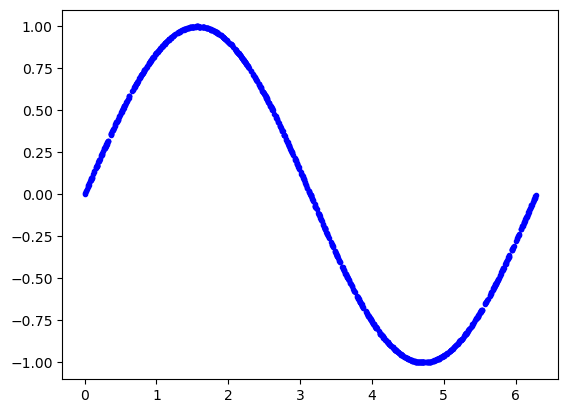

In [3]:
# data sample 생성 개수
SAMPLES = 1000

# random seed
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# sine 주기 내 균일하게 분포된 난수 집합을 생성
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# 추후 훈련을 진행하기 위해 미리 값을 shuffle한다.
# training에서는 임의의 순서로 data가 투입되어야 한다.
np.random.shuffle(x_values)

# 해당 sine 값을 계산
y_values = np.sin(x_values)

# 해당 data를 시각화
# 'b.'는 점 색상(blue)을 의미
plt.plot(x_values, y_values, 'b.')
plt.show()

data에 임의의 noise를 추가해 준다.

- `np.random.randn`: 정규분포에서 난수 생성

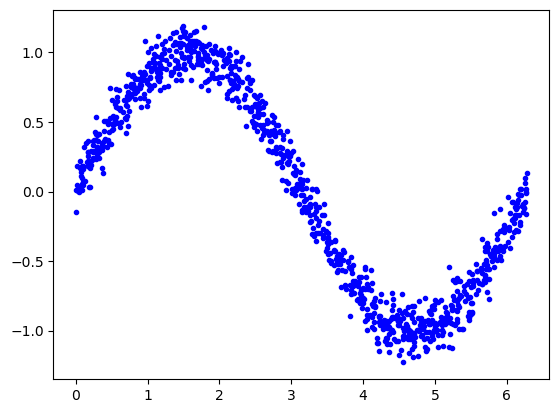

In [4]:
# y값에 임의로 작은 숫자를 추가한다.
y_values += 0.1 * np.random.randn(*y_values.shape)

# 그래프로 확인해 보자.
plt.plot(x_values, y_values, 'b.')
plt.show()

---

## 4.3 data split

data를 train, validation, test 세 부분으로 분할한다.(60/20/20으로 할 것이다.)

In [7]:
# index 계산
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# train 60%, validation 20%, test 20%
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# 분할한 data를 합치면 원래 사이즈와 맞는지 재차 확인한다.
assert(x_train.size + x_validate.size + x_test.size) == SAMPLES

분할한 data를 시각화해서 살펴보자.

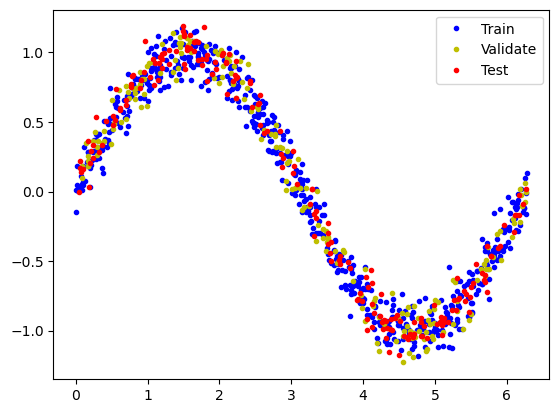

In [8]:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

---

## 4.4 model 정의하기

In [10]:
from tensorflow.keras import layers

model_1 = tf.keras.Sequential()

# layer 1: neuron 16개, activation function은 relu
model_1.add(layers.Dense(16, activation = 'relu', input_shape = (1,)))

# output layer: neuron 1개(원하는 값이 하나이기 때문)
model_1.add(layers.Dense(1))

# compile: optimizer는 rmsprop, loss function은 MSE를 사용한다.
model_1.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

# model summary 출력
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


---

## 4.5 model training

In [11]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
                        validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 12ms/step - loss: 1.0602 - mae: 0.8823 - val_loss: 0.6391 - val_mae: 0.7240
Epoch 2/1000
38/38 [==============================] - 0s 7ms/step - loss: 0.5012 - mae: 0.6281 - val_loss: 0.4785 - val_mae: 0.6012
Epoch 3/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.4205 - mae: 0.5614 - val_loss: 0.4206 - val_mae: 0.5679
Epoch 4/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.3721 - mae: 0.5288 - val_loss: 0.3710 - val_mae: 0.5281
Epoch 5/1000
38/38 [==============================] - 0s 7ms/step - loss: 0.3302 - mae: 0.5004 - val_loss: 0.3262 - val_mae: 0.4904
Epoch 6/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.2917 - mae: 0.4699 - val_loss: 0.2940 - val_mae: 0.4621
Epoch 7/1000
38/38 [==============================] - 0s 7ms/step - loss: 0.2622 - mae: 0.4458 - val_loss: 0.2683 - val_mae: 0.4453
Epoch 8/1000
38/38 [==============================] - 0s 7ms/step - loss: 0

---

## 4.6 결과 시각화

history 객체를 활용해서 결과를 시각화할 것이다.

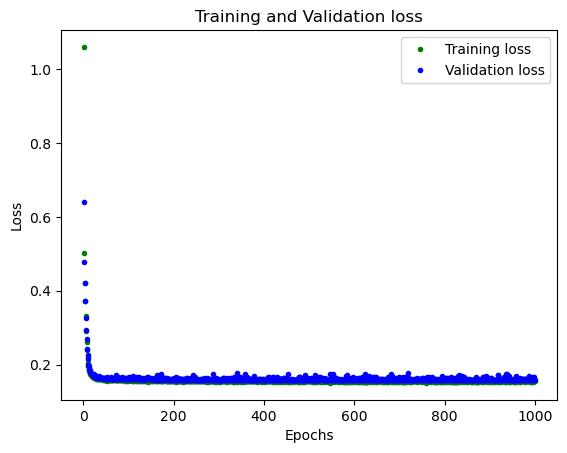

In [12]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

epoch 50 부근에서 급격히 감소하므로, 더 자세히 살펴보기 위해서 첫 100 epoch를 건너뛰고 시각화하자.

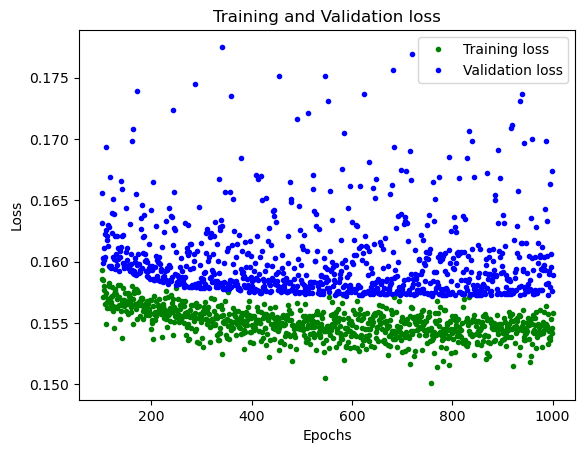

In [13]:
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

이번에는 model이 예측한 결과(Predicted, 빨간색 표시)를 test data set(Actual, 파란색 표시)과 비교해 보자.

19/19 [==============================] - 0s 3ms/step


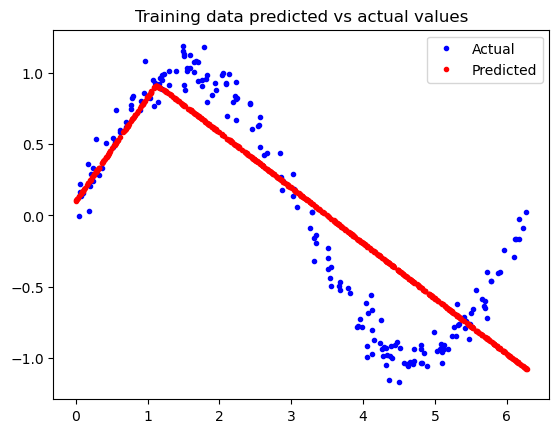

In [14]:
# model의 예측값(train data 바탕)
predictions = model_1.predict(x_train)

# test data set과 비교
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label = 'Actual')
plt.plot(x_train, predictions, 'r.', label = 'Predicted')
plt.legend()
plt.show()

결과를 보면 model이 sine을 제한적으로만 approximate한다는 것을 알 수 있다. 앞서 model size를 너무 작게 설계하였던 것을 회상해 보자.

---

## 4.7 문제를 개선한 model

In [15]:
model_2 = tf.keras.Sequential()

model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation='relu'))
# output layer
model_2.add(layers.Dense(1))

model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [16]:
history_2 = model_2.fit(x_train, y_train, epochs = 600, batch_size = 16,
                        validation_data = (x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 1s 11ms/step - loss: 0.3791 - mae: 0.5335 - val_loss: 0.3594 - val_mae: 0.5194
Epoch 2/600
38/38 [==============================] - 0s 6ms/step - loss: 0.3139 - mae: 0.4890 - val_loss: 0.3086 - val_mae: 0.4752
Epoch 3/600
38/38 [==============================] - 0s 7ms/step - loss: 0.2657 - mae: 0.4508 - val_loss: 0.2596 - val_mae: 0.4409
Epoch 4/600
38/38 [==============================] - 0s 6ms/step - loss: 0.2308 - mae: 0.4194 - val_loss: 0.2269 - val_mae: 0.4115
Epoch 5/600
38/38 [==============================] - 0s 6ms/step - loss: 0.2064 - mae: 0.3971 - val_loss: 0.2011 - val_mae: 0.3851
Epoch 6/600
38/38 [==============================] - 0s 5ms/step - loss: 0.1875 - mae: 0.3756 - val_loss: 0.1910 - val_mae: 0.3648
Epoch 7/600
38/38 [==============================] - 0s 6ms/step - loss: 0.1781 - mae: 0.3615 - val_loss: 0.1849 - val_mae: 0.3646
Epoch 8/600
38/38 [==============================] - 0s 7ms/step - loss: 0.1719 - 

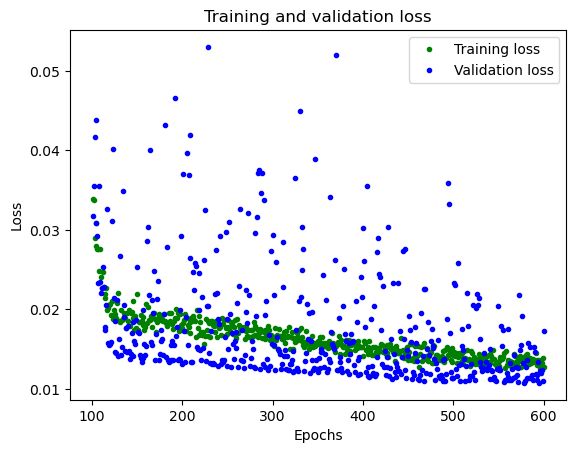

In [17]:
# 시각화
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label = 'Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 3ms/step


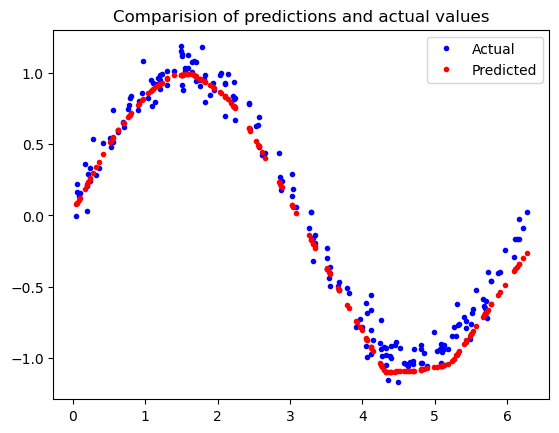

In [20]:
# test
loss = model_2.evaluate(x_test, y_test)
predictions = model_2.predict(x_test)

# 시각화
plt.clf()
plt.title('Comparision of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

---

## 4.8 TFLite용 model 변환

TensorFlow Lite converter의 Python API를 이용해서 **FlatBuffer** 형식으로 model을 변환할 것이다.

> 이외에도 TFLite converter는 quantization과 같은 유용한 optimization 기능을 여럿 제공한다.

In [22]:
# 버전 1
# quantization 없이 convert
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# model을 저장
open("sine_model.tflite", "wb").write(tflite_model)


# 버전 2
# quantization을 적용하여 convert
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)

# quantization을 포함한 기본 optimization 수행
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# validation data의 x값을 대표 data set으로 제공하는 생성 함수
def representative_dataset_generator():
    for value in x_test:
        # 반드시 2차원 array 형태로 제공해야 한다.
        yield [np.array(value, dtype = np.float32, ndmin = 2)]
        
converter.representative_dateset = representative_dataset_generator

# convert
tflite_model = converter.convert()

# model을 저장
open("sine_model_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpn5ikop9p/assets


INFO:tensorflow:Assets written to: /tmp/tmpn5ikop9p/assets


INFO:tensorflow:Assets written to: /tmp/tmpdzfnxre1/assets


INFO:tensorflow:Assets written to: /tmp/tmpdzfnxre1/assets


3196

이번에는 tflite 파일을 사용해 보자. tflite를 사용할 때는 다음 과정을 거쳐서 수행해야 한다.

1. interpreter 객체 인스턴스화

2. model memory allocate

3. input tensor에 input 값 작성

4. model 호출

5. output tensor에서 output 값 읽기

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


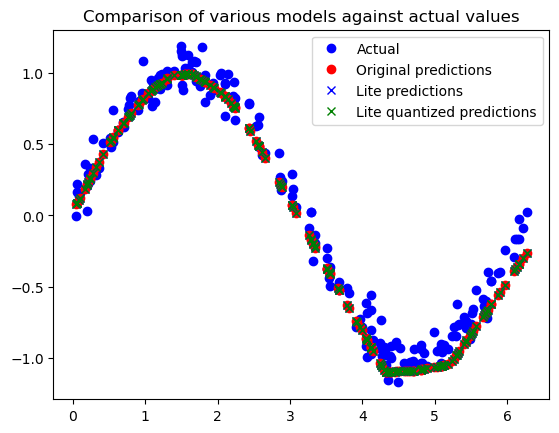

In [23]:
# 1. 앞서 만든 model을 interpreter 인스턴스화한다.
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# 2. memory allocate
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# 3. input과 output tensor index 가져오기
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

# 결과를 저장하기 위한 array 생성
sine_model_predictions = []
sine_model_quantized_predictions = []

# 4. 각 값에 대해 model의 interpreter를 실행한 뒤 결과를 array에 저장
for x_value in x_test:
    # 2차원 tensor
    x_value_tensor = tf.convert_to_tensor([[x_value]], dtype = np.float32)
    # sine_model
    # 값을 input tensor에 쓰기
    sine_model.set_tensor(sine_model_input_index, x_value_tensor)
    # 추론 실행
    sine_model.invoke()
    # 예측값을 output tensor에서 읽기
    sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])
    # sine_model_quantized
    sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
    sine_model_quantized.invoke()
    sine_model_quantized_predictions.append(
        sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])
    
# data 시각화
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label = 'Actual')
plt.plot(x_test, predictions, 'ro', label = 'Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label = 'Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label = 'Lite quantized predictions')
plt.legend()
plt.show()

원래 model, converted model, converted+quantized model 모두 잘 에측한 것을 확인할 수 있다. 이제 model의 크기를 살펴보자.

In [25]:
# import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 3192 bytes
Quantized model is 3196 bytes
Difference is -4 bytes


---

## 4.9 C 파일로 변환

model을 application에 포함할 수 있도록 C source file로 변환하는 과정이 필요하다. 대부분의 microcontroller에는 file system이 없으므로, memory에 직접 load할 수 있는 C source file 형식으로 model을 제공하는 것이다.

> file system이 있다고 해도 이는 오히려 memory space의 제약 조건으로 작용한다.

변환을 거치면 model은 byte array로 정의된다. 이 변환은 `xxd`라는 Unix tool을 이용해서 수행한다.

다음은 quantized model을 변환하는 code이다.

In [26]:
# xxd 설치
# !apt-get -qq install xxd

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [27]:
# 파일을 C source file로 저장
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# source file 출력
!cat sine_model_quantized.cc

unsigned char sine_model_quantized_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x94, 0x00, 0x00, 0x00, 0xec, 0x00, 0x00, 0x00, 0x08, 0x07, 0x00, 0x00,
  0x18, 0x07, 0x00, 0x00, 0x28, 0x0c, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00,
  0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0a, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x38, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f,
  0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x94, 0xff, 0xff, 0xff, 0x09, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x07, 0x00, 0x00, 0x00, 0x64, 0x65, 0x6e, 0x73,
  0x65, 0x5f, 0x34, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x

> 사용하기 위해서는 이 source를 복사해서 붙여 넣거나 변환된 파일을 옮기면 된다.